# Probing

In [1]:
import pandas as pd
from pipeline_config import list_of_models, list_of_prompts, quantizations
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

N = 100
results = pd.read_csv(f"outputs/cities_regression_2025-04-08_{N}.csv")
results.head()

,checkpoint,type,quantization,prompt,r2_lat,r2_lng,mse_lat,mse_lng,distances_in_km
0,Mistral-7B-v0.1_float16_empty,base,float16,empty,0.553984,0.590316,2.539939,2.546766,"[293.86206643792065, 68.55419284761815, 43.912..."
1,Mistral-7B-v0.1_float16_where_fr,base,float16,where_fr,0.654626,0.651520,1.966813,2.166295,"[126.6153304505103, 88.7044982485857, 33.37019..."
2,Mistral-7B-v0.1_float16_gps_fr,base,float16,gps_fr,0.727551,0.702007,1.551523,1.852445,"[185.6426418011254, 118.27409526037145, 50.428..."
3,Mistral-7B-v0.1_float16_where_en,base,float16,where_en,0.638347,0.522961,2.059519,2.965475,"[250.83013532358595, 153.93426166382346, 57.57..."
4,Mistral-7B-v0.1_float16_gps_en,base,float16,gps_en,0.681452,0.635122,1.814046,2.268235,"[101.43006078660342, 69.49105872423192, 56.487..."


## Linear regression: half-precision 

### Mistral : city name only

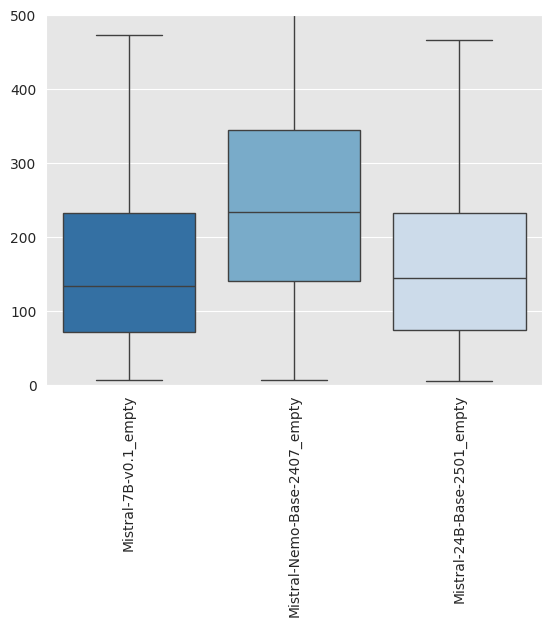

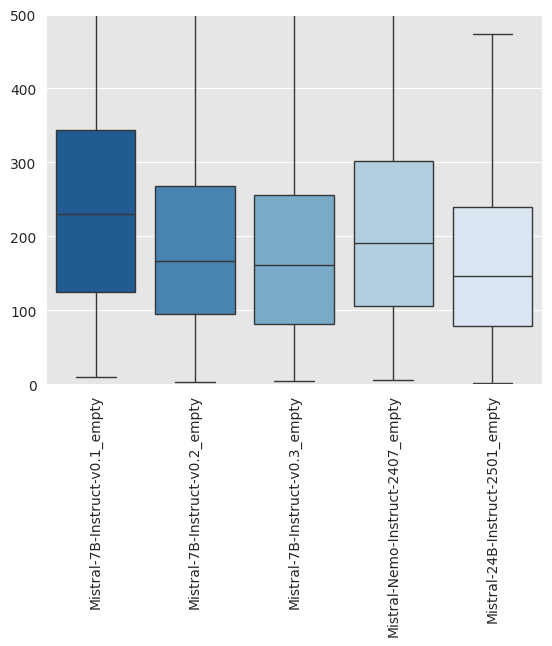

In [2]:
precision = "float16"
checkpoints = {}
checkpoints["base"] = ["Mistral-7B-v0.1", "Mistral-Nemo-Base-2407", "Mistral-Small-24B-Base-2501",]
checkpoints["instruct"] = ["Mistral-7B-Instruct-v0.1", "Mistral-7B-Instruct-v0.2", "Mistral-7B-Instruct-v0.3", "Mistral-Nemo-Instruct-2407","Mistral-Small-24B-Instruct-2501"]
for version in ["base", "instruct"]:
    data = {}
    for c in checkpoints[version]:
        c = c + f"_{precision}_empty"
        dist = json.loads(results[results.checkpoint == c].distances_in_km.values[0])
        c = c.replace(f"_{precision}", "").replace("Small-", "")
        data[c] = np.sort(dist)
    sns.boxplot(data, palette="Blues_r", showfliers=False)
    plt.tick_params(axis="x", rotation=90)
    plt.ylim(0, 500)
    plt.show()

### Mistral: where/GPS, fr/en

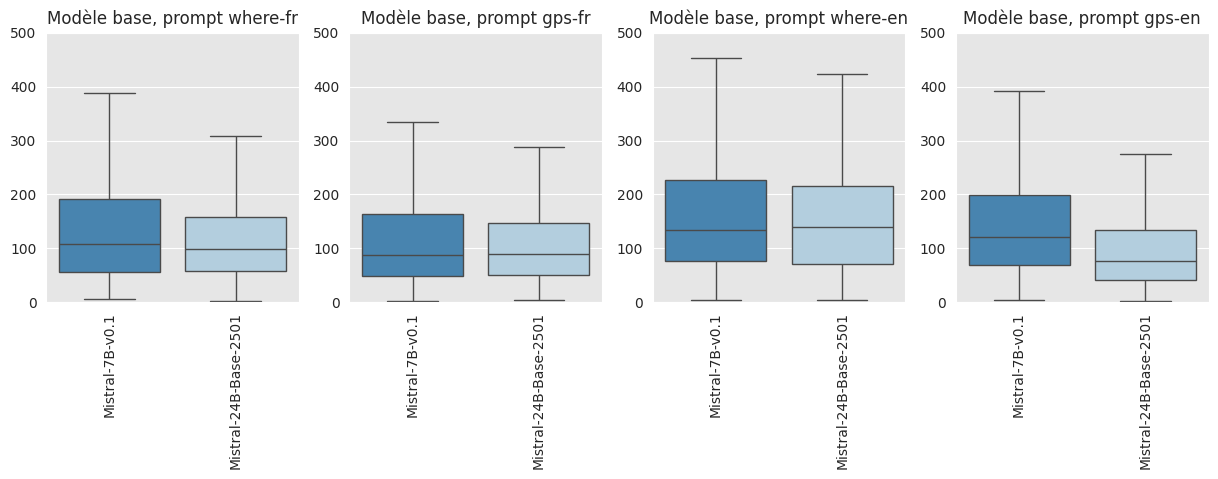

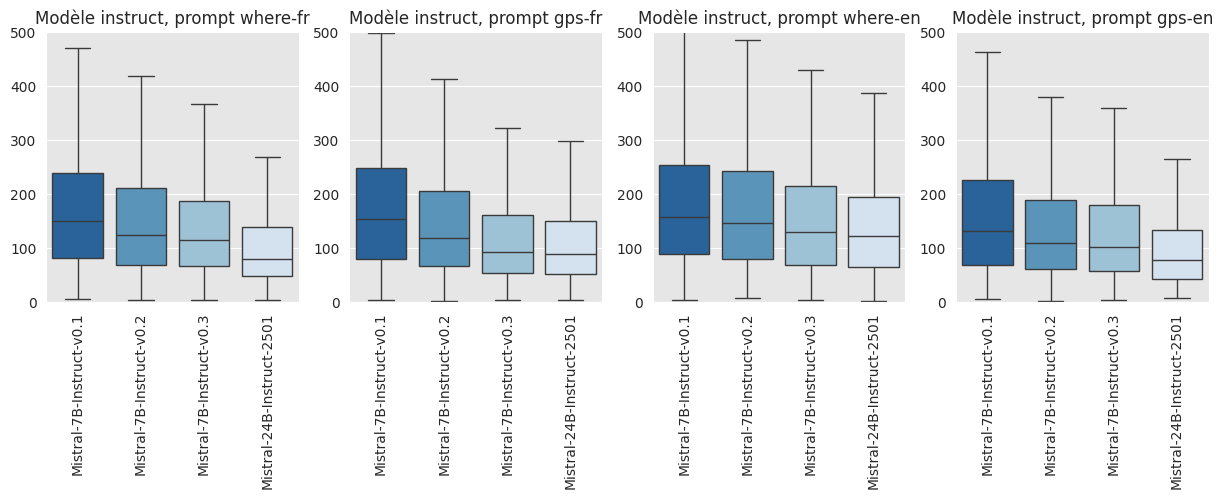

In [3]:
precision = "float16"
for model_version in ["base", "instruct"]:
    fig, axes = plt.subplots(1, 4, figsize=(15, 3.5))
    for i, conf in enumerate([("fr", "where"), ("fr", "gps"), ("en", "where"), ("en", "gps")]):
        lang = conf[0]
        prompt = conf[1]
        checkpoints = [f"Mistral-7B-Instruct-v0.1_{precision}_{prompt}_{lang}", f"Mistral-7B-Instruct-v0.2_{precision}_{prompt}_{lang}", f"Mistral-7B-Instruct-v0.3_{precision}_{prompt}_{lang}", f"Mistral-Small-24B-Instruct-2501_{precision}_{prompt}_{lang}"]  
        if model_version == "base":
            checkpoints = [c.replace("-Instruct", "").replace("24B", "24B-Base") for c in checkpoints if "0.2" not in c and "0.3" not in c]
        data = {}
        for c in checkpoints:
            dist = json.loads(results[results.checkpoint == c].distances_in_km.values[0])
            c = c.replace(f"_{precision}_{prompt}_{lang}", "").replace("Small-", "")
            data[c] = np.sort(dist)
        sns.boxplot(data, palette="Blues_r", showfliers=False, ax=axes[i])
        axes[i].tick_params(axis="x", rotation=90)
        axes[i].set_ylim(0, 500)
        axes[i].set_title(f"Modèle {model_version}, prompt {prompt}-{lang}")
    plt.show()

### Llama: city name only

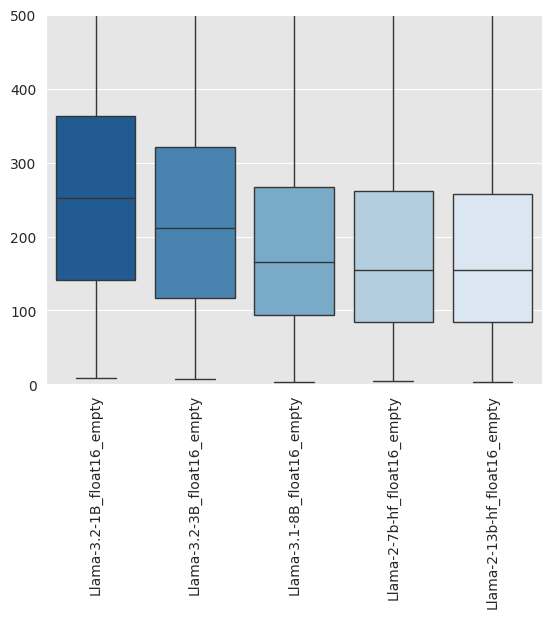

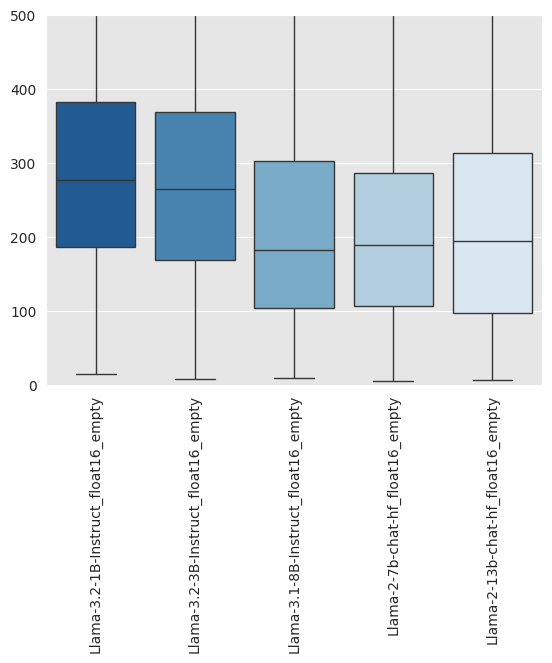

In [4]:
precision = "float16"
checkpoints = {}
checkpoints["base"] = ["Llama-3.2-1B",
                   "Llama-3.2-3B", 
                   "Llama-3.1-8B", 
                   "Llama-2-7b-hf", 
                   "Llama-2-13b-hf"]
checkpoints["instruct"] = ["Llama-3.2-1B-Instruct", 
                   "Llama-3.2-3B-Instruct", 
                   "Llama-3.1-8B-Instruct", 
                   "Llama-2-7b-chat-hf",
                   "Llama-2-13b-chat-hf"]
for version in ["base", "instruct"]:
    data = {}
    for c in checkpoints[version]:
        c = c + f"_{precision}_empty"
        dist = json.loads(results[results.checkpoint == c].distances_in_km.values[0])
        c = c.replace(f"_{precision}_{prompt}_{lang}", "")
        data[c] = np.sort(dist)
    sns.boxplot(data, palette="Blues_r", showfliers=False)
    plt.tick_params(axis="x", rotation=90)
    plt.ylim(0, 500)
    plt.show()

### Llama: where/GPS, fr/en

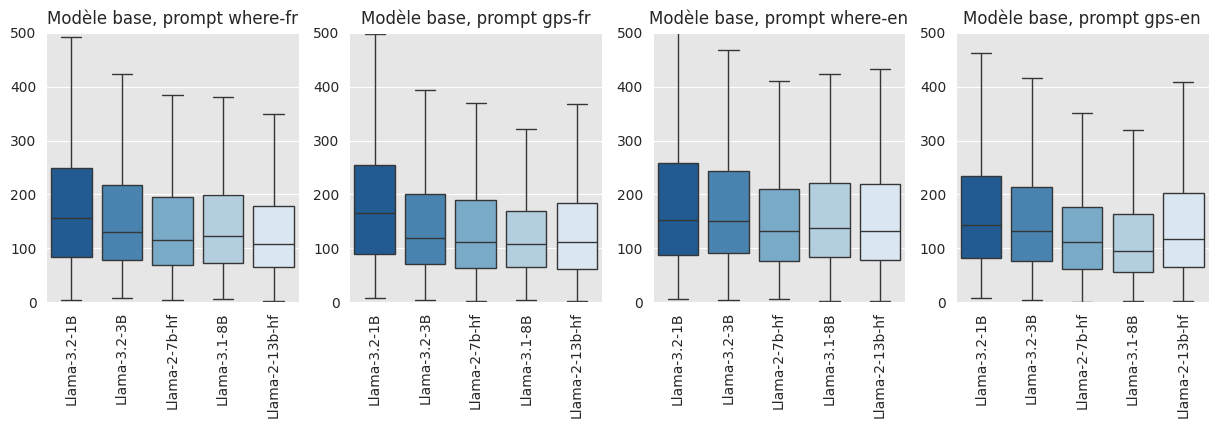

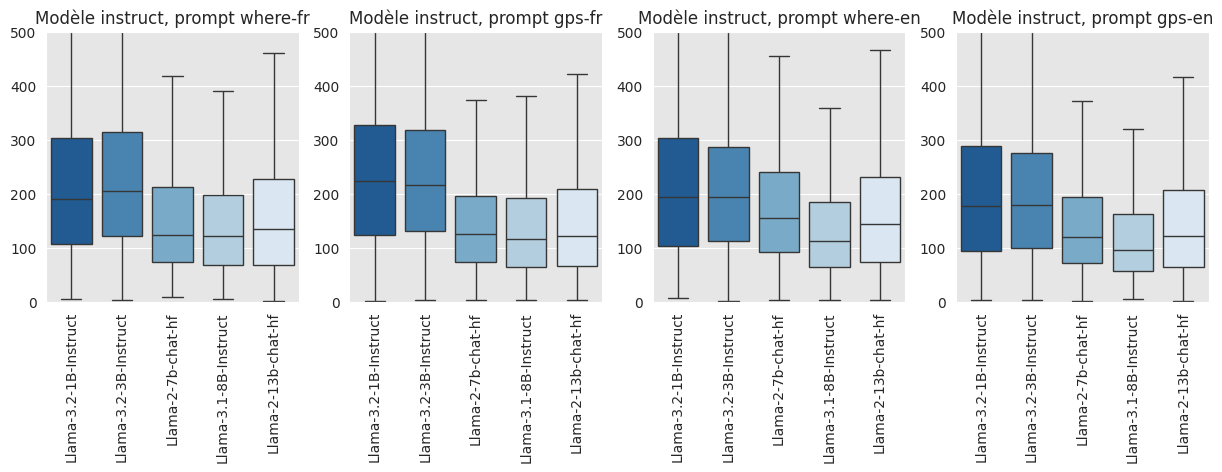

In [5]:
precision = "float16"
for model_version in ["base", "instruct"]:
    fig, axes = plt.subplots(1, 4, figsize=(15, 3.5))
    for i, conf in enumerate([("fr", "where"), ("fr", "gps"), ("en", "where"), ("en", "gps")]):
        lang = conf[0]
        prompt = conf[1]
        checkpoints = [f"Llama-3.2-1B-Instruct_{precision}_{prompt}_{lang}", f"Llama-3.2-3B-Instruct_{precision}_{prompt}_{lang}", f"Llama-2-7b-chat-hf_{precision}_{prompt}_{lang}", f"Llama-3.1-8B-Instruct_{precision}_{prompt}_{lang}", f"Llama-2-13b-chat-hf_{precision}_{prompt}_{lang}"]
        if model_version == "base":
            checkpoints = [c.replace("-Instruct", "").replace("-chat", "") for c in checkpoints]
        data = {}
        for c in checkpoints:
            dist = json.loads(results[results.checkpoint == c].distances_in_km.values[0])
            c = c.replace(f"_{precision}_{prompt}_{lang}", "")
            data[c] = np.sort(dist)
        sns.boxplot(data, palette="Blues_r", showfliers=False, ax=axes[i])
        axes[i].tick_params(axis="x", rotation=90)
        axes[i].set_ylim(0, 500)
        axes[i].set_title(f"Modèle {model_version}, prompt {prompt}-{lang}")
    plt.show()

### Qwen: where/GPS, fr/en

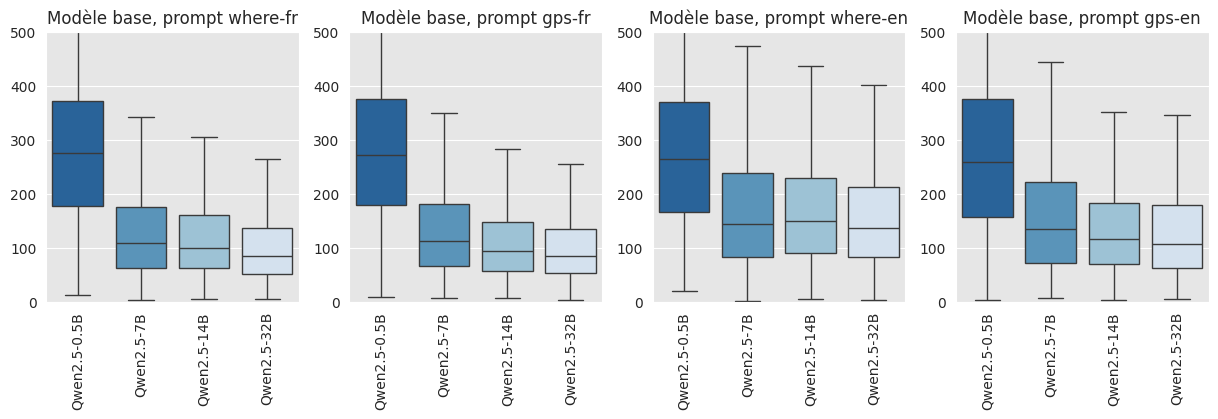

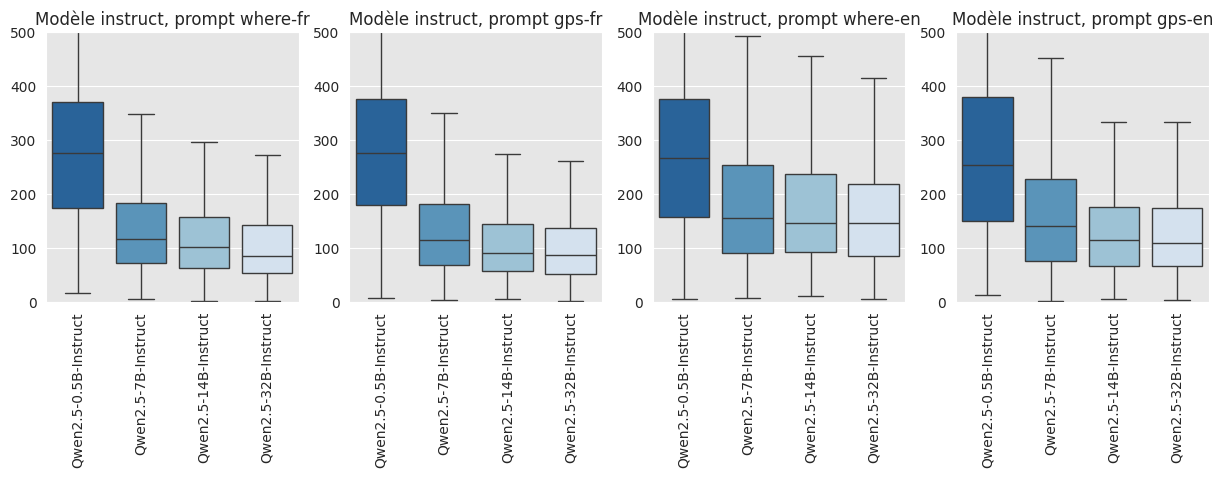

In [6]:
precision = "float16"
for model_version in ["base", "instruct"]:
    fig, axes = plt.subplots(1, 4, figsize=(15, 3.5))
    for i, conf in enumerate([("fr", "where"), ("fr", "gps"), ("en", "where"), ("en", "gps")]):
        lang = conf[0]
        prompt = conf[1]
        checkpoints = [f"Qwen2.5-0.5B-Instruct_{precision}_{prompt}_{lang}", f"Qwen2.5-7B-Instruct_{precision}_{prompt}_{lang}", f"Qwen2.5-14B-Instruct_{precision}_{prompt}_{lang}", f"Qwen2.5-32B-Instruct_{precision}_{prompt}_{lang}"]
        if model_version == "base":
            checkpoints = [c.replace("-Instruct", "") for c in checkpoints]
        data = {}
        for c in checkpoints:
            dist = json.loads(results[results.checkpoint == c].distances_in_km.values[0])
            c = c.replace(f"_{precision}_{prompt}_{lang}", "")
            data[c] = np.sort(dist)
        sns.boxplot(data, palette="Blues_r", showfliers=False, ax=axes[i])
        axes[i].tick_params(axis="x", rotation=90)
        axes[i].set_ylim(0, 500)
        axes[i].set_title(f"Modèle {model_version}, prompt {prompt}-{lang}")
    plt.show()

## Linear regression: 4-bit quantization

### Mistral

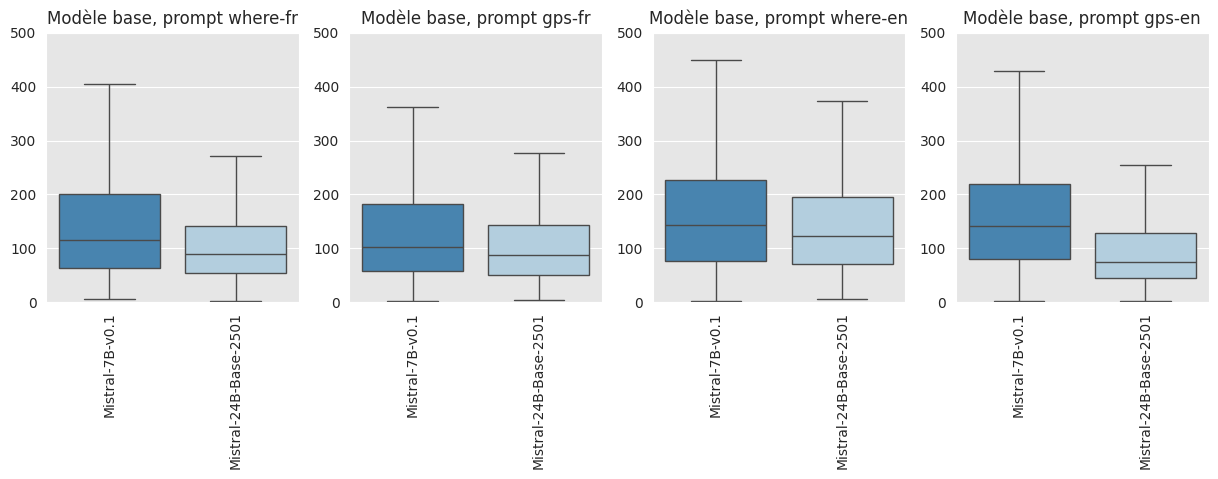

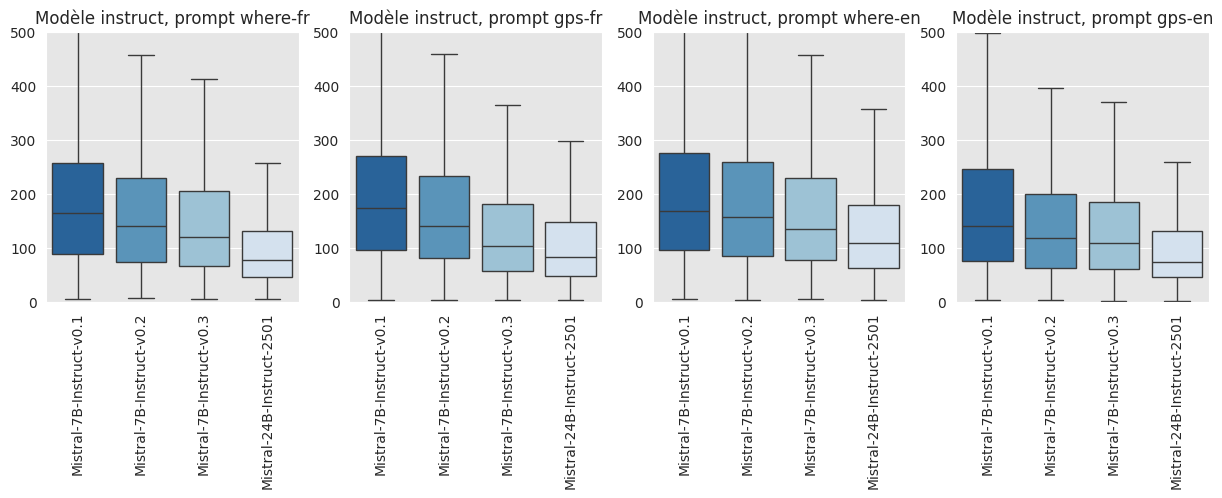

In [7]:
precision = "int4"
for model_version in ["base", "instruct"]:
    fig, axes = plt.subplots(1, 4, figsize=(15, 3.5))
    for i, conf in enumerate([("fr", "where"), ("fr", "gps"), ("en", "where"), ("en", "gps")]):
        lang = conf[0]
        prompt = conf[1]
        checkpoints = [f"Mistral-7B-Instruct-v0.1_{precision}_{prompt}_{lang}", f"Mistral-7B-Instruct-v0.2_{precision}_{prompt}_{lang}", f"Mistral-7B-Instruct-v0.3_{precision}_{prompt}_{lang}", f"Mistral-Small-24B-Instruct-2501_{precision}_{prompt}_{lang}"]  
        if model_version == "base":
            checkpoints = [c.replace("-Instruct", "").replace("24B", "24B-Base") for c in checkpoints if "0.2" not in c and "0.3" not in c]
        data = {}
        for c in checkpoints:
            dist = json.loads(results[results.checkpoint == c].distances_in_km.values[0])
            c = c.replace(f"_{precision}_{prompt}_{lang}", "").replace("Small-", "")
            data[c] = np.sort(dist)
        sns.boxplot(data, palette="Blues_r", showfliers=False, ax=axes[i])
        axes[i].tick_params(axis="x", rotation=90)
        axes[i].set_ylim(0, 500)
        axes[i].set_title(f"Modèle {model_version}, prompt {prompt}-{lang}")
    plt.show()

### Llama

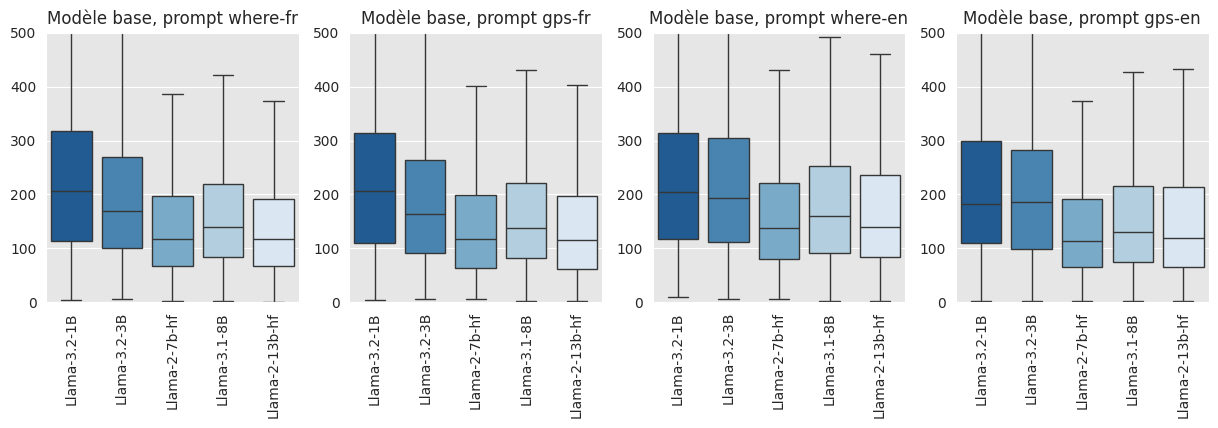

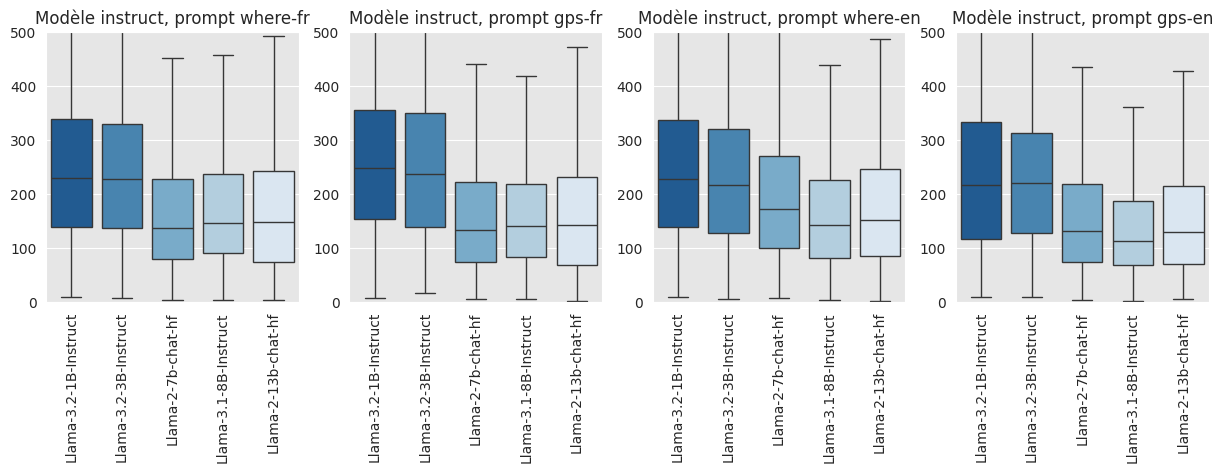

In [8]:
precision = "int4"
for model_version in ["base", "instruct"]:
    fig, axes = plt.subplots(1, 4, figsize=(15, 3.5))
    for i, conf in enumerate([("fr", "where"), ("fr", "gps"), ("en", "where"), ("en", "gps")]):
        lang = conf[0]
        prompt = conf[1]
        checkpoints = [f"Llama-3.2-1B-Instruct_{precision}_{prompt}_{lang}", f"Llama-3.2-3B-Instruct_{precision}_{prompt}_{lang}", f"Llama-2-7b-chat-hf_{precision}_{prompt}_{lang}", f"Llama-3.1-8B-Instruct_{precision}_{prompt}_{lang}", f"Llama-2-13b-chat-hf_{precision}_{prompt}_{lang}"]
        if model_version == "base":
            checkpoints = [c.replace("-Instruct", "").replace("-chat", "") for c in checkpoints]
        data = {}
        for c in checkpoints:
            dist = json.loads(results[results.checkpoint == c].distances_in_km.values[0])
            c = c.replace(f"_{precision}_{prompt}_{lang}", "")
            data[c] = np.sort(dist)
        sns.boxplot(data, palette="Blues_r", showfliers=False, ax=axes[i])
        axes[i].tick_params(axis="x", rotation=90)
        axes[i].set_ylim(0, 500)
        axes[i].set_title(f"Modèle {model_version}, prompt {prompt}-{lang}")
    plt.show()

## Qwen

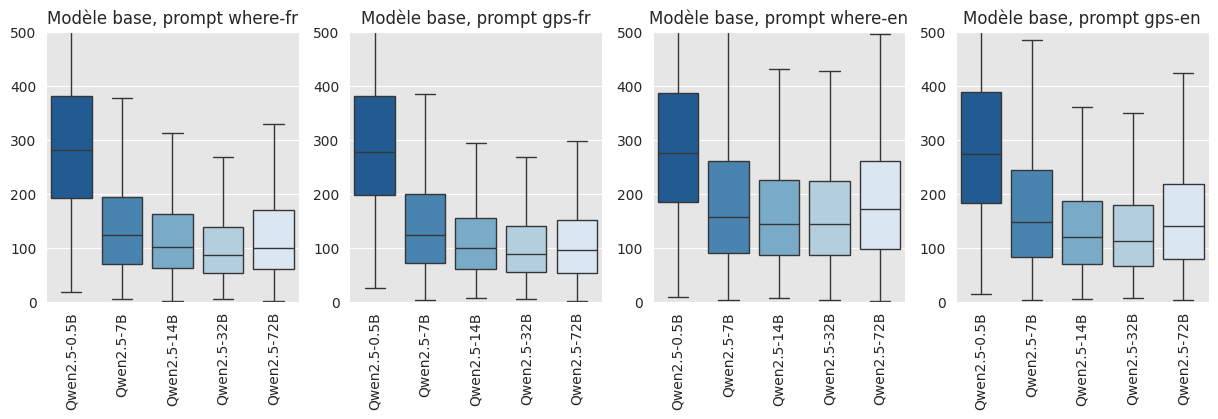

IndexError: index 0 is out of bounds for axis 0 with size 0

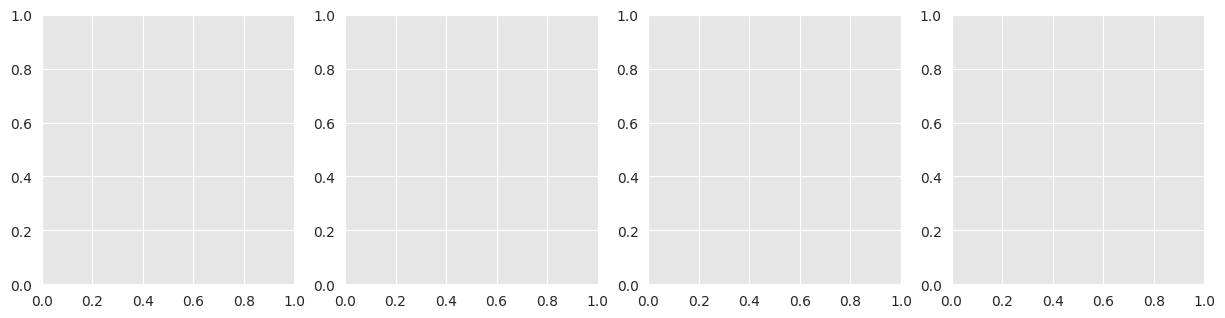

In [9]:
precision = "int4"
for model_version in ["base", "instruct"]:
    fig, axes = plt.subplots(1, 4, figsize=(15, 3.5))
    for i, conf in enumerate([("fr", "where"), ("fr", "gps"), ("en", "where"), ("en", "gps")]):
        lang = conf[0]
        prompt = conf[1]
        checkpoints = [f"Qwen2.5-0.5B-Instruct_{precision}_{prompt}_{lang}", f"Qwen2.5-7B-Instruct_{precision}_{prompt}_{lang}", f"Qwen2.5-14B-Instruct_{precision}_{prompt}_{lang}", f"Qwen2.5-32B-Instruct_{precision}_{prompt}_{lang}", f"Qwen2.5-72B-Instruct_{precision}_{prompt}_{lang}"]
        if model_version == "base":
            checkpoints = [c.replace("-Instruct", "") for c in checkpoints]
        data = {}
        for c in checkpoints:
            dist = json.loads(results[results.checkpoint == c].distances_in_km.values[0])
            c = c.replace(f"_{precision}_{prompt}_{lang}", "")
            data[c] = np.sort(dist)
        sns.boxplot(data, palette="Blues_r", showfliers=False, ax=axes[i])
        axes[i].tick_params(axis="x", rotation=90)
        axes[i].set_ylim(0, 500)
        axes[i].set_title(f"Modèle {model_version}, prompt {prompt}-{lang}")
    plt.show()